# Colorizing the Russian Empire

Automatically produce a color image from the digitized Prokudin-Gorskii glass plate images with as few visual artifacts as possible.

ref: https://www.learnopencv.com/image-alignment-ecc-in-opencv-c-python/

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_image(fname):
    img = cv2.imread(fname, 0)
    height = int(img.shape[0]/3)
    width = img.shape[1]
    rgb_img = np.zeros((height, width, 3), dtype=np.uint8)
    for i in range(3):
        rgb_img[:,:,2-i] = img[height*i:height*(i+1),:]
    return rgb_img, height, width

In [3]:
def get_gradient(im) :
    # Calculate the x and y gradients using Sobel operator
    grad_x = cv2.Sobel(im,cv2.CV_32F,1,0,ksize=3)
    grad_y = cv2.Sobel(im,cv2.CV_32F,0,1,ksize=3)
    # Combine the two gradients
    grad = cv2.addWeighted(np.absolute(grad_x), 0.5, np.absolute(grad_y), 0.5, 0)
    return grad

In [4]:
def align_image(rgb_img, height, width, warp_mode, number_of_iterations, termination_eps):
    # Allocate space for aligned image
    im_aligned = np.zeros((height,width,3), dtype=np.uint8 )

    # The blue and green channels will be aligned to the red channel.
    # So copy the red channel
    im_aligned[:,:,0] = rgb_img[:,:,0]

    # Set the warp matrix to identity.
    if warp_mode == cv2.MOTION_HOMOGRAPHY :
            warp_matrix = np.eye(3, 3, dtype=np.float32)
    else :
            warp_matrix = np.eye(2, 3, dtype=np.float32)

    # Set the stopping criteria for the algorithm.
    criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

    # Warp the blue and green channels to the red channel
    for i in range(1,3) :
        (cc, warp_matrix) = cv2.findTransformECC (get_gradient(rgb_img[:,:,0]), get_gradient(rgb_img[:,:,i]),warp_matrix, warp_mode, criteria)

        if warp_mode == cv2.MOTION_HOMOGRAPHY :
            # Use Perspective warp when the transformation is a Homography
            im_aligned[:,:,i] = cv2.warpPerspective (rgb_img[:,:,i], warp_matrix, (width,height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
        else :
            # Use Affine warp when the transformation is not a Homography
            im_aligned[:,:,i] = cv2.warpAffine(rgb_img[:,:,i], warp_matrix, (width, height), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP);
#         print(warp_matrix)
    return im_aligned


In [5]:
def plot_image(img, fname):
#     plt.figure(figsize=(6,8))
    plt.imshow(img)
    plt.axis('off')
    plt.savefig(fname)
    plt.show()

In [6]:
def pyramid(img, h, w):
    if h<=400:
        return img, h, w
    else:
        h = h/2
        while h>=300:
            img = cv2.pyrDown(img)
            h = h/2
        return img, img.shape[0], img.shape[1]

In [7]:
def colorizing(fname, ftype):
    number_of_iterations = 5000
    termination_eps = 1e-10
    img, h, w = read_image('./hw2_data/task3_colorizing/'+fname+'.'+ftype)
    img, h, w = pyramid(img, h, w)
    
    warp_mode = cv2.MOTION_TRANSLATION
    result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
    plot_image(result, './task3/'+fname+'_translation.jpg')

    warp_mode = cv2.MOTION_EUCLIDEAN
    result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
    plot_image(result, './task3/'+fname+'_euclidean.jpg')
    
    warp_mode = cv2.MOTION_AFFINE
    result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
    plot_image(result, './task3/'+fname+'_affine.jpg')
    
    warp_mode = cv2.MOTION_HOMOGRAPHY
    result = align_image(img, h, w, warp_mode, number_of_iterations, termination_eps)
    plot_image(result, './task3/'+fname+'_homography.jpg')

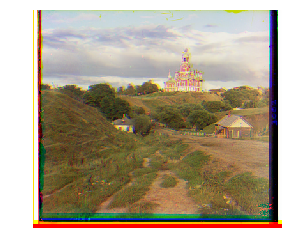

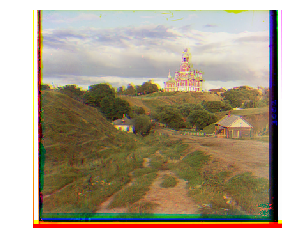

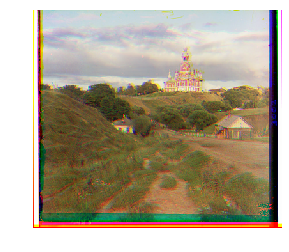

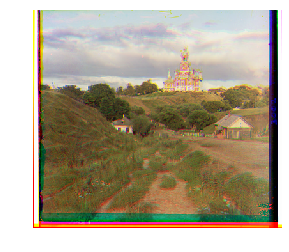

In [8]:
colorizing('cathedral', 'jpg')

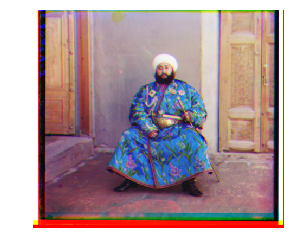

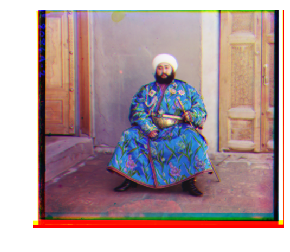

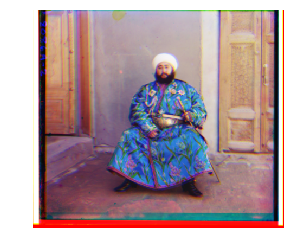

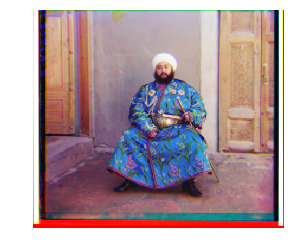

In [9]:
colorizing('emir', 'tif')

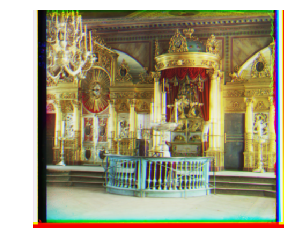

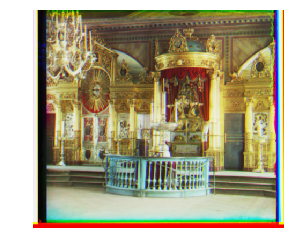

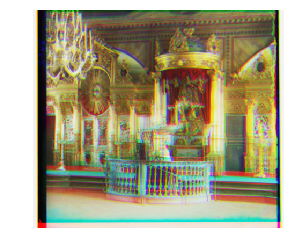

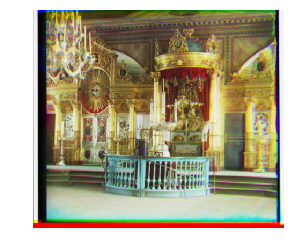

In [10]:
colorizing('icon', 'tif')

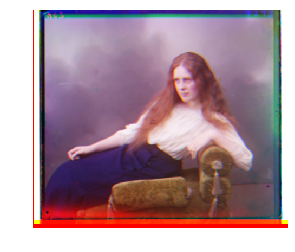

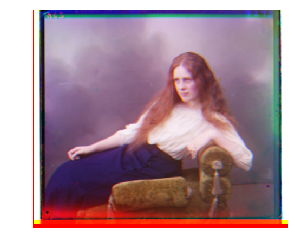

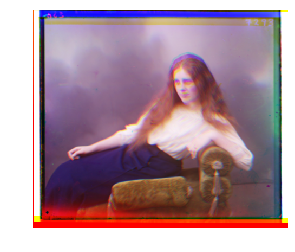

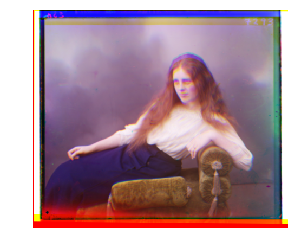

In [11]:
colorizing('lady', 'tif')

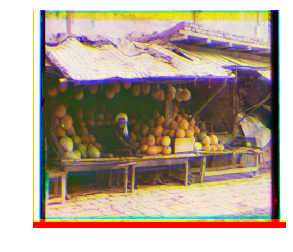

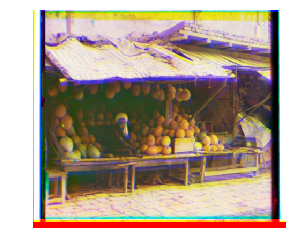

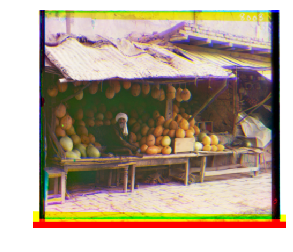

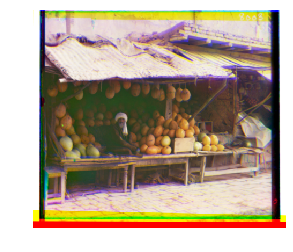

In [12]:
colorizing('melons', 'tif')

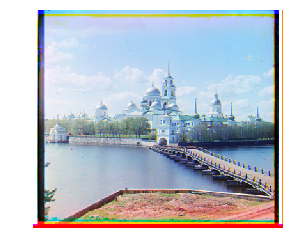

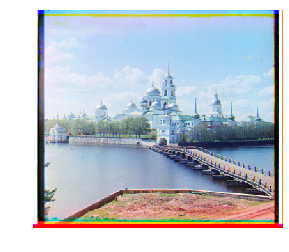

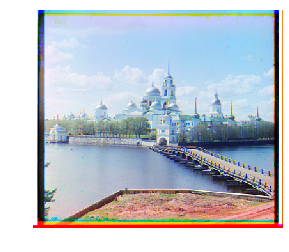

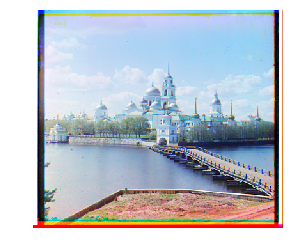

In [13]:
colorizing('monastery', 'jpg')

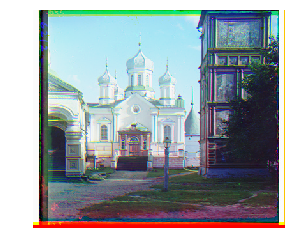

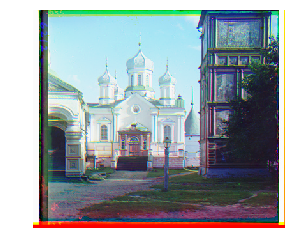

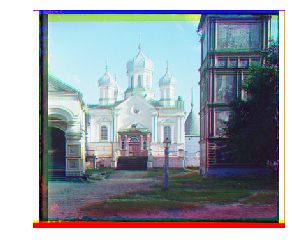

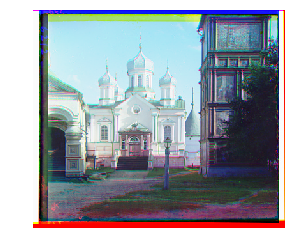

In [14]:
colorizing('nativity', 'jpg')

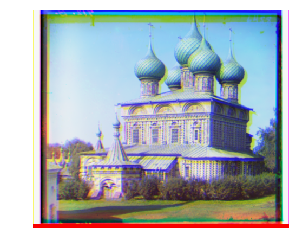

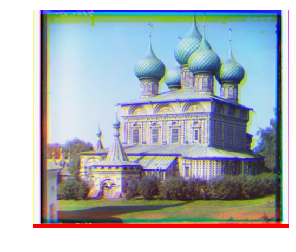

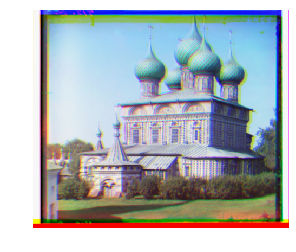

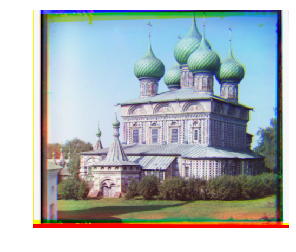

In [15]:
colorizing('onion_church', 'tif')

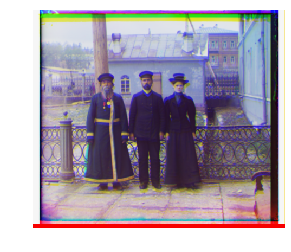

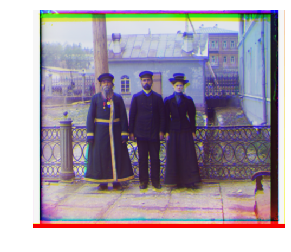

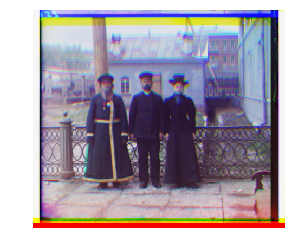

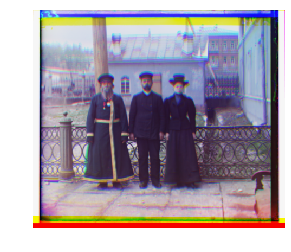

In [16]:
colorizing('three_generations', 'tif')

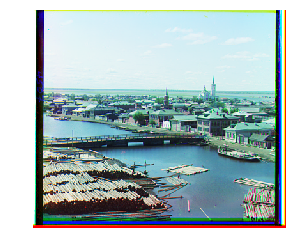

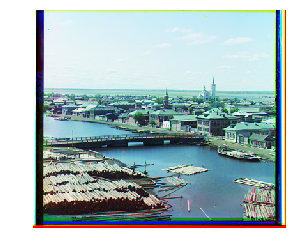

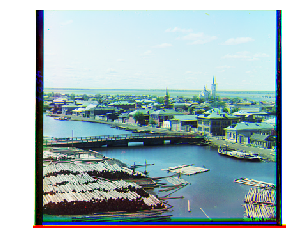

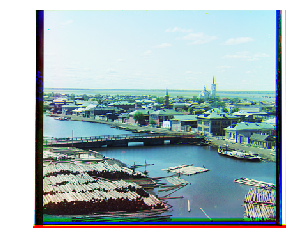

In [17]:
colorizing('tobolsk', 'jpg')

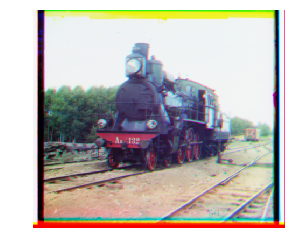

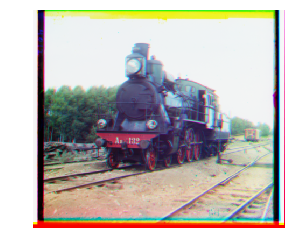

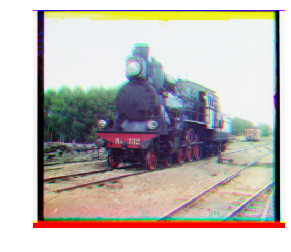

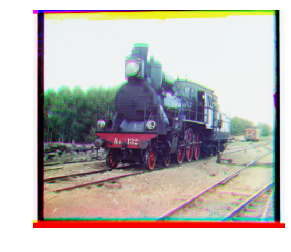

In [18]:
colorizing('train', 'tif')

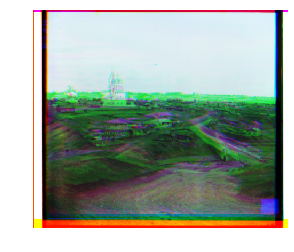

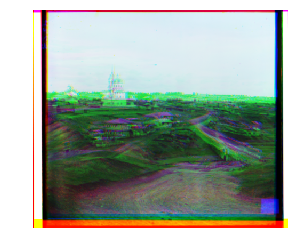

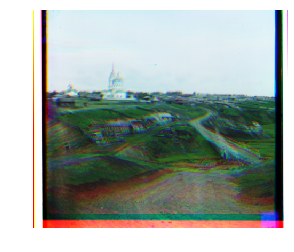

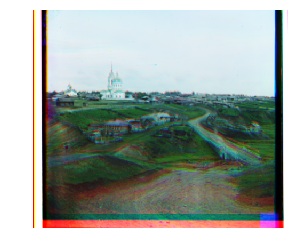

In [19]:
colorizing('village', 'tif')

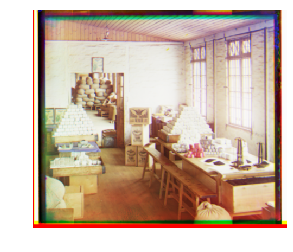

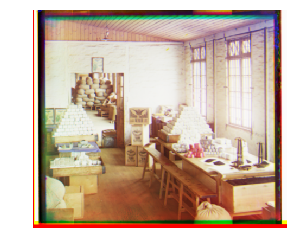

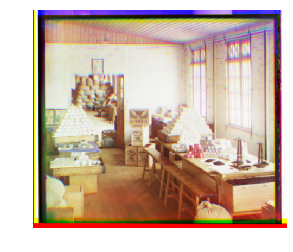

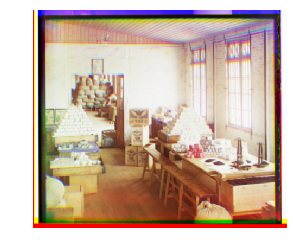

In [20]:
colorizing('workshop', 'tif')